In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
df = pd.read_csv("accepted_2007_to_2018Q2.csv")

/Users/Tim/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(2004091, 151)

In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [4]:
missing_data_pct = df.isna().mean().sort_values(ascending=False)

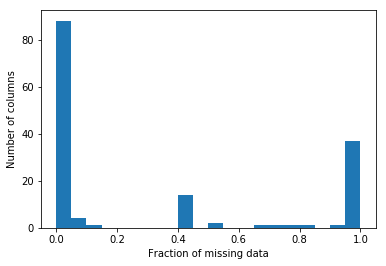

In [5]:
plt.hist(missing_data_pct, bins=20);
plt.xlabel("Fraction of missing data");
plt.ylabel("Number of columns");

In [6]:
columns_to_drop = missing_data_pct[missing_data_pct>0.2].index

In [7]:
len(columns_to_drop)

58

In [8]:
df = df.drop(labels = columns_to_drop, axis=1)

In [9]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,38098114,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,...,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,N,Cash,N
1,36805548,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,...,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,Cash,N
2,37842129,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,Programming Analysis Supervisor,...,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,N,Cash,N
3,37612354,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,Senior Sales Professional,...,100.0,0.0,0.0,368700.0,18007.0,4400.0,18000.0,N,Cash,N
4,37662224,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,Technical Specialist,...,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,N,Cash,N


In [10]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'Late (16-30 days)', 'In Grace Period', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

We keep only loans which have the loan status "Fully Paid" or "Charged Off" , and transform this column into a default binary variable (0 = default, 1 = no default)

In [103]:
df = df.loc[df['loan_status'].isin(["Fully Paid", "Charged Off"])]
df["default"] = df["loan_status"].replace({"Fully Paid": 0, "Charged Off": 1})

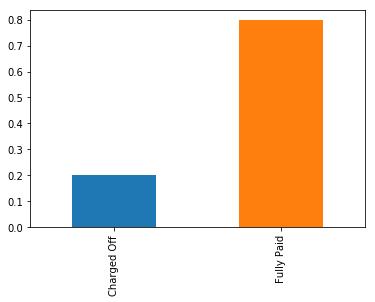

In [12]:
(df['loan_status'].value_counts().sort_index()/len(df)).plot.bar(stacked=True);

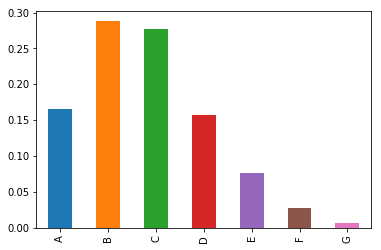

In [13]:
(df['grade'].value_counts().sort_index()/len(df)).plot.bar();

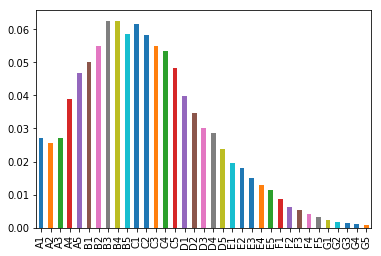

In [14]:
(df['sub_grade'].value_counts().sort_index()/len(df)).plot.bar();

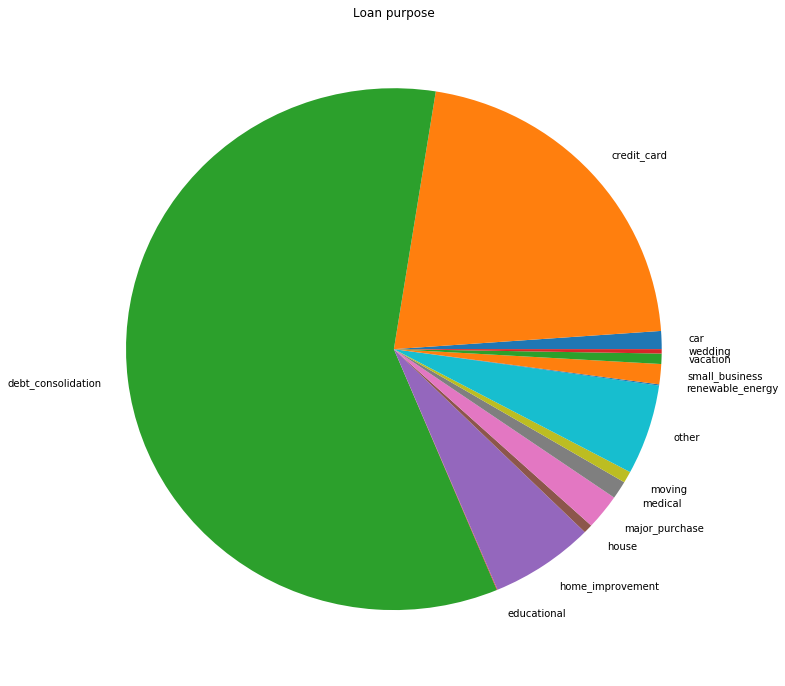

In [38]:
(df['purpose'].value_counts().sort_index()/len(df)).plot.pie(figsize=(12,12));
plt.ylabel("");
plt.title("Loan purpose");

In [39]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

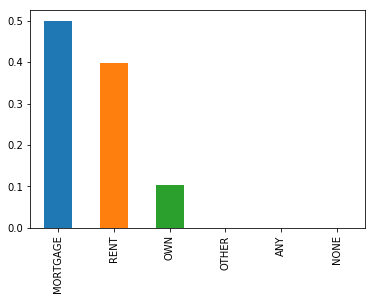

In [49]:
(df['home_ownership'].value_counts()/len(df)).plot.bar();

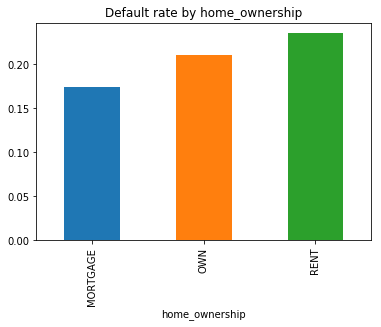

In [110]:
df[df['home_ownership'].isin(['MORTGAGE','OWN','RENT'])].groupby('home_ownership')['default'].mean().plot.bar();
plt.title("Default rate by home_ownership");

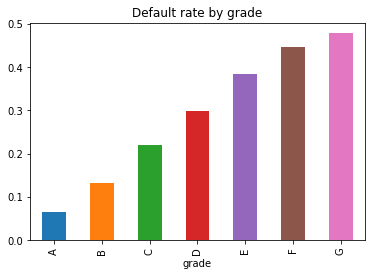

In [111]:
df.groupby('grade')['default'].mean().plot.bar();
plt.title("Default rate by grade");

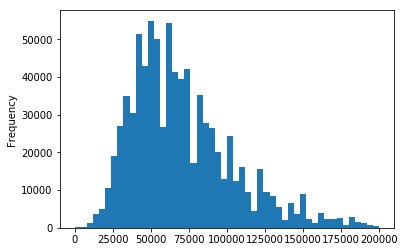

In [124]:
df.loc[df['annual_inc']<200000,'annual_inc'].plot.hist(bins=50);

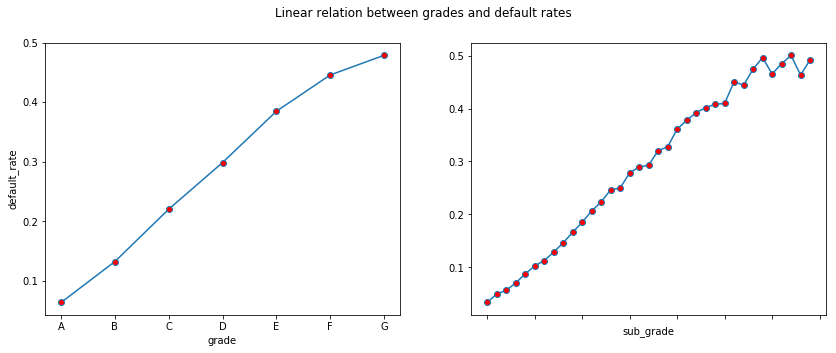

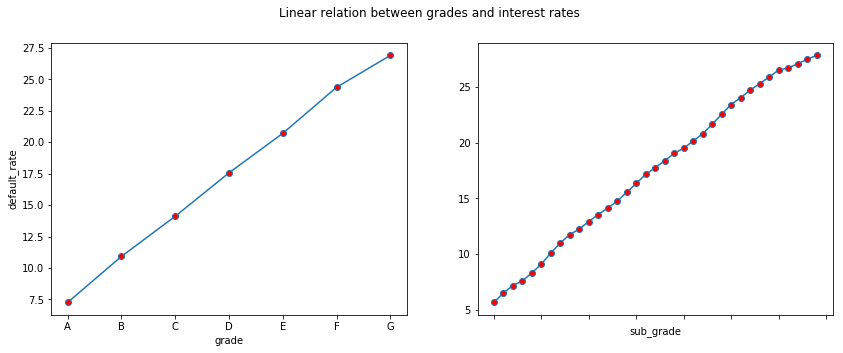

In [226]:
ax1,ax2 = plt.subplots(1,2, figsize=(14,5))[1]
plt.suptitle("Linear relation between grades and default rates")
s=df.groupby('grade')['default'].mean()
ax1.plot(s.index,s,marker = 'o',markerfacecolor='red');
ax1.set_xlabel("grade");
ax1.set_ylabel('default_rate');
df.groupby('sub_grade')['default'].mean().plot(marker = 'o',markerfacecolor='red',ax=ax2);

ax1,ax2 = plt.subplots(1,2, figsize=(14,5))[1]
plt.suptitle("Linear relation between grades and interest rates")
s=df.groupby('grade')['int_rate'].mean()
ax1.plot(s.index,s,marker = 'o',markerfacecolor='red');
ax1.set_xlabel("grade");
ax1.set_ylabel('default_rate');
df.groupby('sub_grade')['int_rate'].mean().plot(marker = 'o',markerfacecolor='red',ax=ax2);

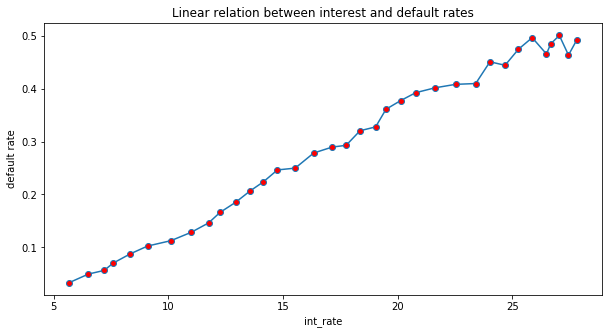

In [236]:
plt.figure(figsize=(10,5));
plt.plot(df.groupby('sub_grade')['int_rate'].mean(),
         df.groupby('sub_grade')['default'].mean(),marker = 'o',markerfacecolor='red');

plt.xlabel("int_rate");
plt.ylabel("default rate")
plt.title("Linear relation between interest and default rates");